# Imports

In [ ]:
# ── Standard library ───────────────────────────────────────────────
import math
import os
import re
import warnings
from glob import glob

# ── Third-party: core scientific stack ─────────────────────────────
import numpy as np
import pandas as pd

# ── Visualization ─────────────────────────────────────────────────
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as fm
from matplotlib.colors import ListedColormap
from matplotlib.image import imread
import seaborn as sns
from PIL import Image

# ── Widgets & notebooks ────────────────────────────────────────────
import ipywidgets as widgets
from ipywidgets import (
    Dropdown,
    FloatSlider,
    HBox,
    Label,
    Layout,
    VBox,
    interact,
)
from ipywidgets.embed import embed_minimal_html
from IPython.display import display, display_html
from tqdm import tqdm

# ── ML / preprocessing ─────────────────────────────────────────────
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ── Global config ──────────────────────────────────────────────────
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 6)


Config

In [ ]:
CONFIG = {
    'PATH': '../../data'
}

Color Palette

Color Palette:


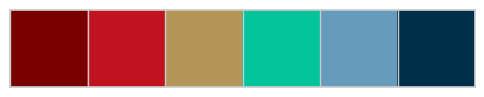

In [ ]:
COLORS = ['#780000', '#c1121f', "#b49659", '#02c39a', '#669bbc', '#003049']
PALETTE = {
    'Dry_Dead_g': COLORS[1],
    'Dry_Clover_g': COLORS[2],
    'Dry_Green_g': COLORS[3],
    'GDM_g': COLORS[4],
    'Dry_Total_g': COLORS[5]
}

print('Color Palette:')
sns.palplot(sns.color_palette(COLORS))

Summarization function

In [ ]:
def summarize(df, desc='Summary'):    
    print(f'\n----- {desc} -----\n')
    print(f'Shape: {df.shape}')
    print(f'Missing: {df.isna().sum().sum()}')
    print(f'Columns: {df.columns.to_list()}\n')
    display_html(df.head(3))
    print('\n')

Load Data

In [ ]:
DATA_DIR = "../../data"
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")
TEST_CSV = os.path.join(DATA_DIR, "test.csv")

train_df = pd.read_csv(TRAIN_CSV)
train_df["Sampling_Date"] = pd.to_datetime(train_df["Sampling_Date"])

test_df = pd.read_csv(TEST_CSV)

Summarization

In [ ]:
summarize(train_df, desc="Train")


----- Train -----

Shape: (1785, 9)
Missing: 0
Columns: ['sample_id', 'image_path', 'Sampling_Date', 'State', 'Species', 'Pre_GSHH_NDVI', 'Height_Ave_cm', 'target_name', 'target']



sample_id 
 image_path 
 Sampling_Date 
 State 
 Species 
 Pre_GSHH_NDVI 
 Height_Ave_cm 
 target_name 
 target 
 
 
 
 
 0 
 ID1011485656__Dry_Clover_g 
 train/ID1011485656.jpg 
 2015-09-04 
 Tas 
 Ryegrass_Clover 
 0.62 
 4.6667 
 Dry_Clover_g 
 0.0000 
 
 
 1 
 ID1011485656__Dry_Dead_g 
 train/ID1011485656.jpg 
 2015-09-04 
 Tas 
 Ryegrass_Clover 
 0.62 
 4.6667 
 Dry_Dead_g 
 31.9984 
 
 
 2 
 ID1011485656__Dry_Green_g 
 train/ID1011485656.jpg 
 2015-09-04 
 Tas 
 Ryegrass_Clover 
 0.62 
 4.6667 
 Dry_Green_g 
 16.2751

In [ ]:
summarize(test_df, desc="Test")


----- Test -----

Shape: (5, 3)
Missing: 0
Columns: ['sample_id', 'image_path', 'target_name']



sample_id 
 image_path 
 target_name 
 
 
 
 
 0 
 ID1001187975__Dry_Clover_g 
 test/ID1001187975.jpg 
 Dry_Clover_g 
 
 
 1 
 ID1001187975__Dry_Dead_g 
 test/ID1001187975.jpg 
 Dry_Dead_g 
 
 
 2 
 ID1001187975__Dry_Green_g 
 test/ID1001187975.jpg 
 Dry_Green_g

# Visualization of distributions

Target count-distribution

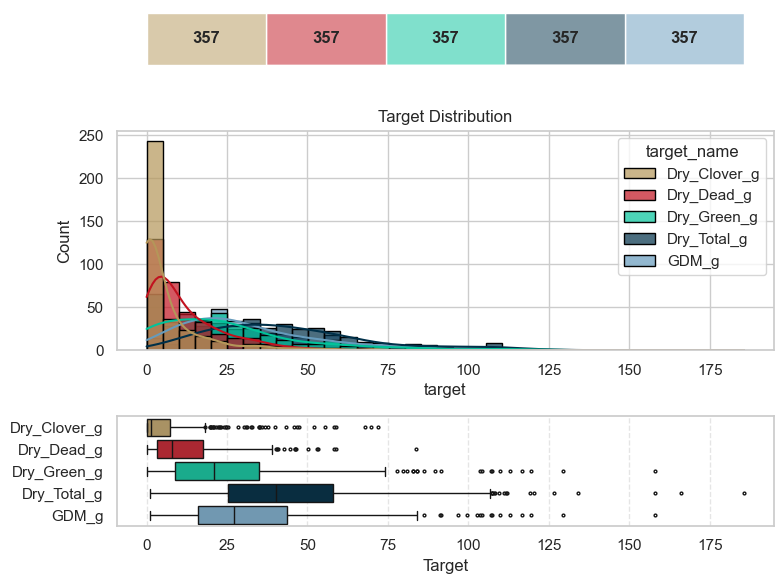

In [ ]:
fig, axes = plt.subplots(
    nrows=3, ncols=1, 
    figsize=(8, 6),
    gridspec_kw={'height_ratios': [1, 4, 2]}
)

sns.histplot(train_df, x='target_name', hue='target_name', palette=PALETTE, ax=axes[0])

for container in axes[0].containers:
    labels = [f'{int(height)}' if height > 0 else '' for height in container.datavalues]
    axes[0].bar_label(
        container,
        labels=labels,
        label_type='center',
        fontsize=12,
        fontweight='bold'
    )

axes[0].axis('off')
axes[0].get_legend().remove()

sns.histplot(
    data=train_df,
    x='target',
    hue='target_name',
    kde=True,
    palette=PALETTE,
    ax=axes[1],
    alpha=0.7,
    edgecolor='black'
)
axes[1].set_title('Target Distribution')

sns.boxplot(
    data=train_df,
    x='target',
    y='target_name',
    palette=PALETTE,
    ax=axes[2],
    fliersize=2
)
axes[2].set_xlabel('Target')
axes[2].set_ylabel('')
axes[2].grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Species count-distribution

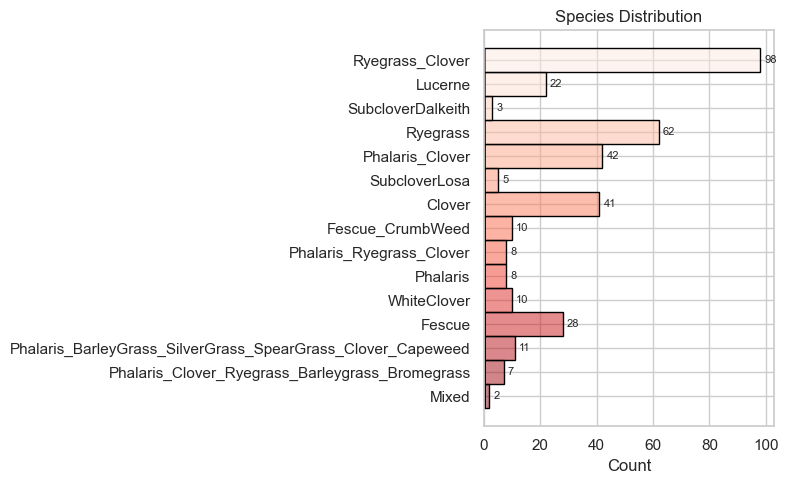

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

red_palette = sns.color_palette("Reds", n_colors=train_df['Species'].nunique())
sns.histplot(
    train_df.drop_duplicates('image_path'),
    y='Species',
    hue='Species',
    palette=red_palette,
    ax=ax,
    edgecolor='black'
)

for container in ax.containers:
    labels = [f'{int(height)}' if height > 0 else '' for height in container.datavalues]
    ax.bar_label(
        container,
        labels=labels,
        label_type='edge',
        fontsize=8,
        padding=3
    )

ax.set_title('Species Distribution')
ax.set_ylabel('')
ax.get_legend().remove()

plt.tight_layout()
plt.show()

State count-distribution

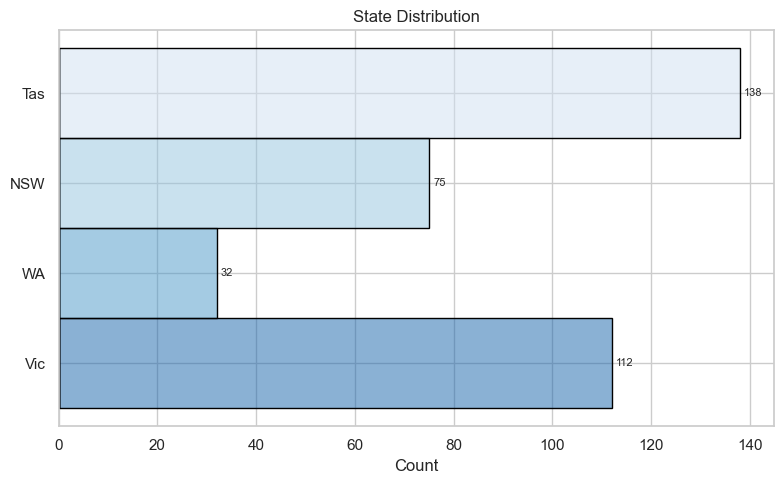

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

blue_palette = sns.color_palette("Blues", n_colors=train_df['State'].nunique())
sns.histplot(
    train_df.drop_duplicates('image_path'),
    y='State',
    hue='State',
    palette=blue_palette,
    ax=ax,
    edgecolor='black'
)

for container in ax.containers:
    labels = [f'{int(height)}' if height > 0 else '' for height in container.datavalues]
    ax.bar_label(
        container,
        labels=labels,
        label_type='edge',
        fontsize=8,
        padding=3
    )

ax.set_title('State Distribution')
ax.set_ylabel('')
ax.get_legend().remove()

plt.tight_layout()
plt.show()

NDVI count-distribution

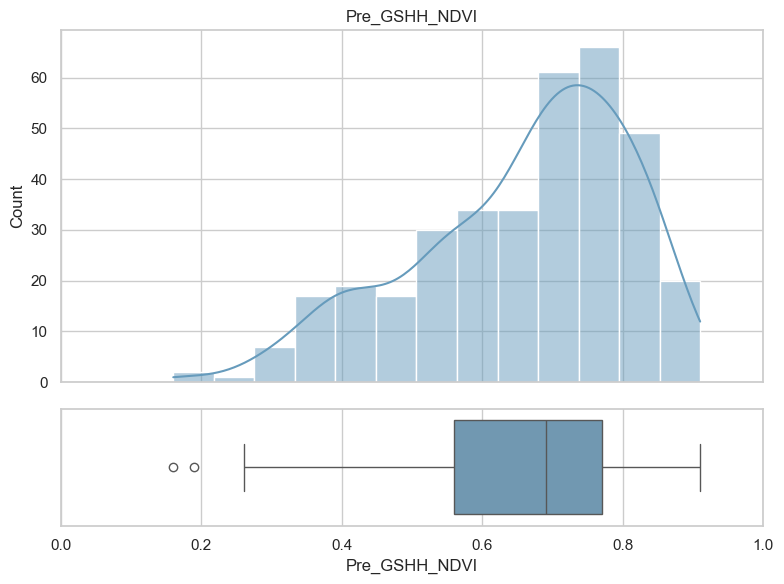

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex='col', gridspec_kw={'height_ratios': [3, 1]})

sns.histplot(train_df.drop_duplicates('image_path')['Pre_GSHH_NDVI'], color=COLORS[-2], kde=True, ax=axes[0])
sns.boxplot(x=train_df.drop_duplicates('image_path')['Pre_GSHH_NDVI'], color=COLORS[-2], ax=axes[1])
axes[0].set_title('Pre_GSHH_NDVI')
axes[1].set_xlabel('Pre_GSHH_NDVI')
axes[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

Height and NDVI Regression-plots

In [ ]:
def plot_target_quant(df, target_list, palette):
    x_list = ['Height_Ave_cm', 'Pre_GSHH_NDVI']
    n_cols = len(target_list)
    n_rows = len(x_list)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 8), sharey='row', sharex='col')

    row_colors = [COLORS[1], COLORS[-2]]

    for row, y_var in enumerate(x_list):
        for col, target_name in enumerate(target_list):
            subset = df[df['target_name'] == target_name]
            sns.regplot(
                data=subset,
                x='target',
                y=y_var,
                ax=axes[row, col],
                scatter_kws={'alpha':0.5, 'color': palette[target_name]},
                line_kws={'color': palette[target_name]},
            )
            rgba = mcolors.to_rgba(row_colors[row], alpha=0.2)
            axes[row, col].set_facecolor(rgba)
            
            if row == 0:
                axes[row, col].set_title(target_name)
            if row == n_rows-1:
                axes[row, col].set_xlabel('target')
            else:
                axes[row, col].set_xlabel('')
            if col == 0:
                axes[row, col].set_ylabel(y_var)
            else:
                axes[row, col].set_ylabel('')

    plt.tight_layout()
    plt.show()

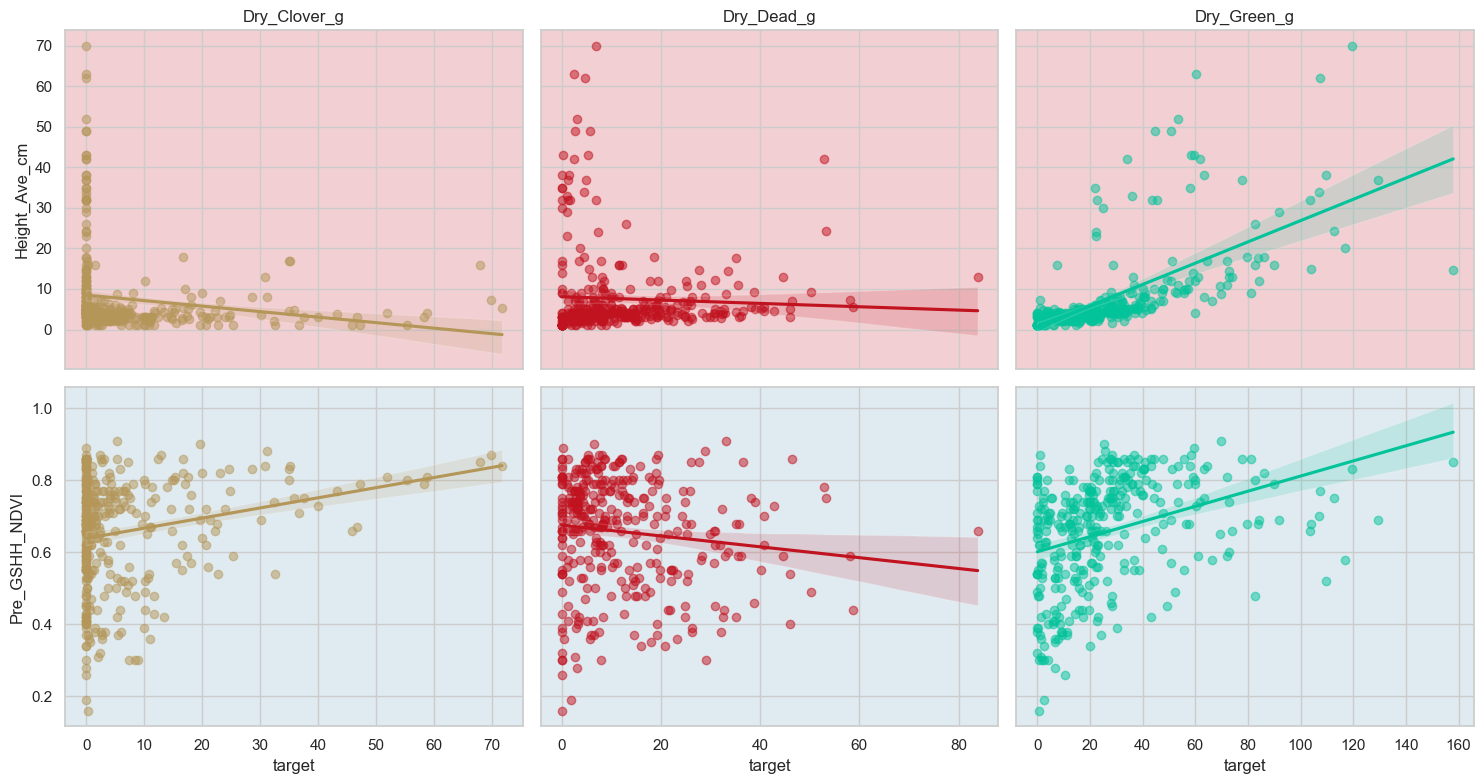

In [ ]:
target_list = ['Dry_Clover_g', 'Dry_Dead_g', 'Dry_Green_g']
plot_target_quant(train_df, target_list, PALETTE)

Image samples from each species (rows)

In [ ]:
def plot_species(
    df,
    num_samples=5,
    figsize=(4, 2),
    seed=42,
):
    base_path = CONFIG.get("PATH", ".")
    species = df["Species"].unique().tolist()

    rng = np.random.default_rng(seed)

    n_rows, n_cols = len(species), num_samples
    fig, axs = plt.subplots(
        n_rows,
        n_cols,
        figsize=(figsize[0] * n_cols, figsize[1] * n_rows),
    )
    axs = np.atleast_2d(axs)

    def get_target(meta, name):
        vals = meta.loc[meta.target_name == name, "target"]
        return float(vals.iloc[0]) if not vals.empty else np.nan

    for i, sp in enumerate(species):
        df_sp = df[df["Species"] == sp]
        samples = df_sp["image_path"].unique()

        chosen = (
            rng.choice(samples, size=min(num_samples, len(samples)), replace=False)
            if len(samples)
            else []
        )

        for j, ax in enumerate(axs[i]):
            ax.axis("off")

            if j >= len(chosen):
                continue

            img_path = os.path.join(base_path, chosen[j])
            img_meta = df_sp[df_sp.image_path == chosen[j]]

            dry_green = get_target(img_meta, "Dry_Green_g")
            dry_dead = get_target(img_meta, "Dry_Dead_g")
            dry_clover = get_target(img_meta, "Dry_Clover_g")

            try:
                with Image.open(img_path) as img:
                    ax.imshow(img)

                ax.set_title(
                    f"{os.path.basename(chosen[j])}\n"
                    f"G:{dry_green:.2f} D:{dry_dead:.2f} C:{dry_clover:.2f}",
                    fontsize=8,
                )
            except Exception:
                ax.text(0.5, 0.5, "Error\nloading", ha="center", va="center", fontsize=8)
                ax.set_title(
                    f"{os.path.basename(chosen[j])}\nError",
                    fontsize=8,
                    color="red",
                )

        axs[i, 0].set_ylabel(
            sp,
            rotation=0,
            fontsize=10,
            labelpad=40,
            va="center",
            ha="right",
        )

    plt.subplots_adjust(hspace=0.4, wspace=0.05)
    plt.show()


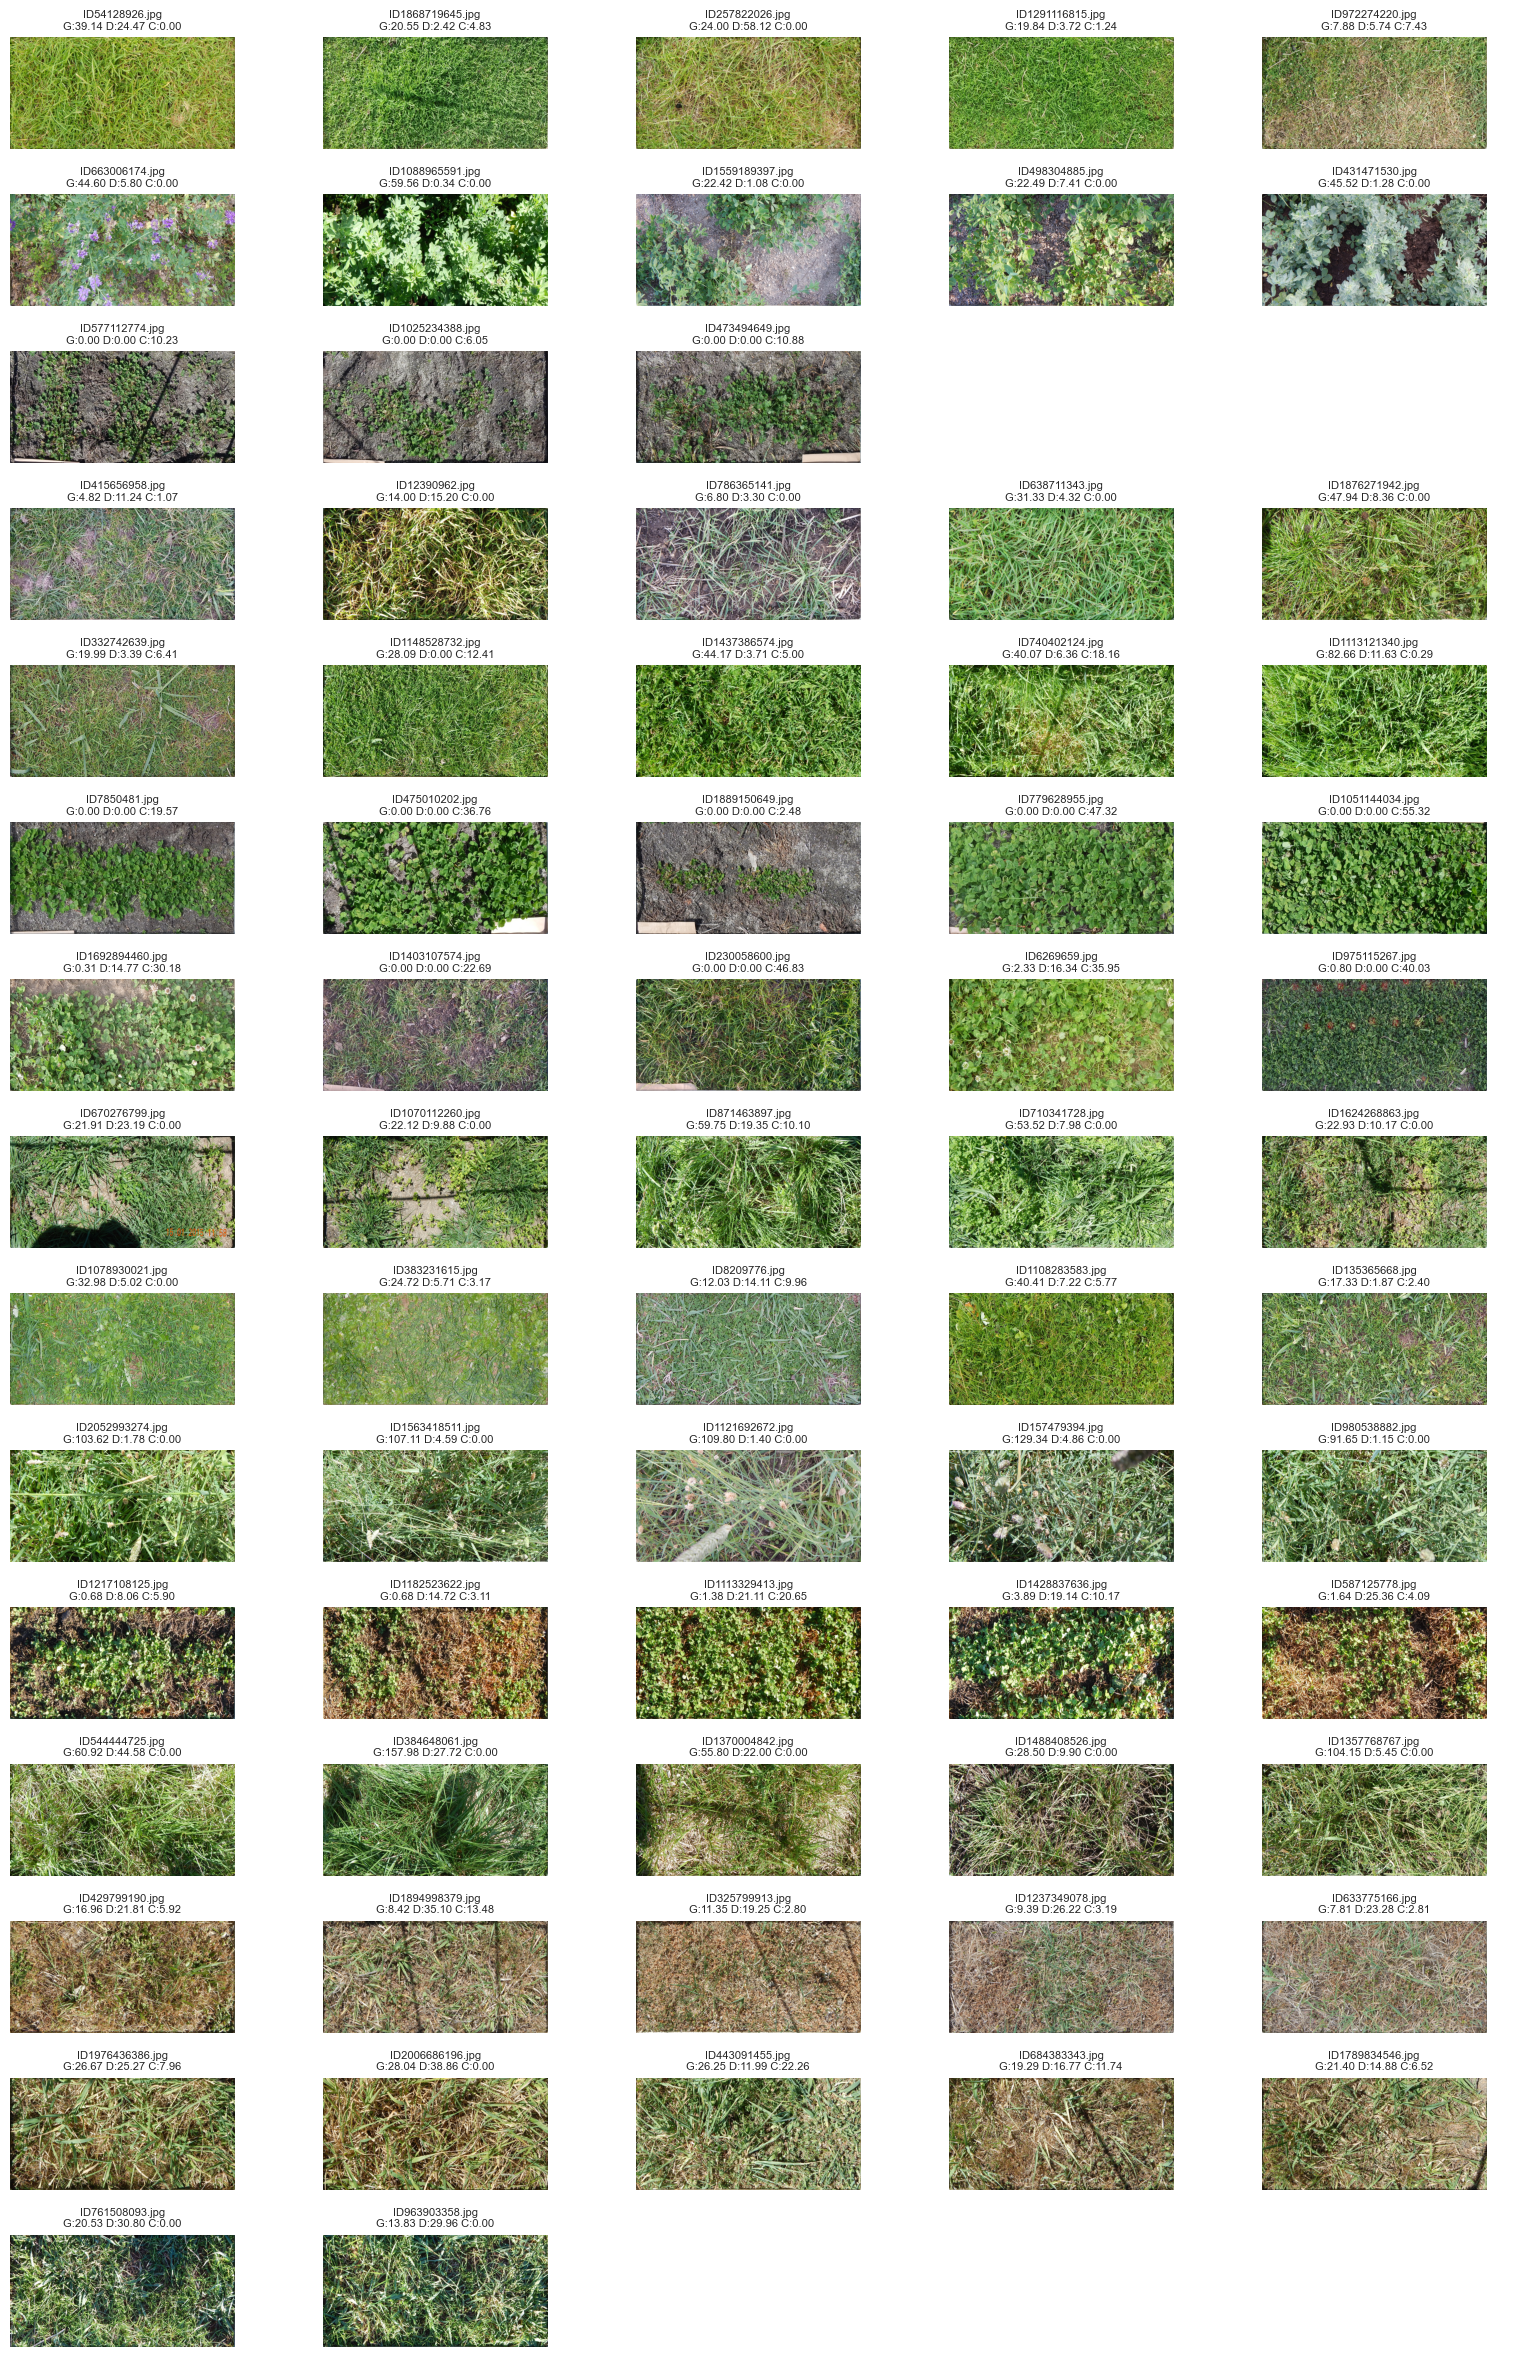

In [ ]:
plot_species(train_df)